# Dataset and description from https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

# About this Dataset

Context

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

Content

This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.
Acknowledgements

This public dataset is part of Airbnb, and the original source can be found on this website.

# Objectives:

1. Compare metrics such as how busy or expensive listings are with their proximity to popular tourist attractions like Times Square.

2. Which neighbourhoods have the most listings? How does this correlate with price and traffic?

3. Listings in which price range are the most popular/busy?

4. What is the cheapest type of listing? What is the most popular?

In [84]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic
import seaborn as sns

sns.set()

In [3]:
# first, how is the dataset structured?
data = pd.read_csv(r'D:\Dropbox\Dropbox\Python\Python Practice\Pandas Projects\New_York_Airbnb\AB_NYC_2019.csv')

print(data.shape)
print(data.columns)
data.head()

(48895, 16)
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Assumptions

1. Price is price in \\$ per night.

2. No attention is paid to how many people each listing can hold, as no such data is given - any effects of that on price (whether it be listed as price per person per night, or just total price per night) is ignored.
I will mention that it is very likely that the more expensive listings are intended for multiple people, but for the purposes of this practice exercise this is ignored, as I have no means of knowing for sure.

3. Number of reviews per month is a reasonable approximation of how busy a listing is.

# 1. Compare metrics such as how busy or expensive listings are with their proximity to popular tourist attractions like Times Square.

In [12]:
# Compare how busy (and expensive) listings are compared to their distance from popular tourist attractions.

# use reviews_per_month as metric for use, as total number of reviews is influenced by how long a listing has been up

data = pd.read_csv(r'D:\Dropbox\Dropbox\Python\Python Practice\Pandas Projects\New_York_Airbnb\AB_NYC_2019.csv')

data = data.drop(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 
                  'minimum_nights', 'last_review', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365'], axis = 1)

# set coordinates for popular NYC tourist attractions
times_square = (40.7580, -73.9855)
statue_of_liberty = (40.6892, -74.0445)
empire_state = (40.7484, -73.9857)
central_park = (40.7829, -73.9654) # presumably the centre of the park

# initialise lambda functions to calculate distances, rounded to nearest half kilometre
# note that the distances calculated are the geodesic distances, see https://en.wikipedia.org/wiki/Geodesic
times_square_calc = lambda x, y: round(geodesic((x, y), times_square).kilometers * 2) / 2.0
statue_of_liberty_calc = lambda x, y: round(geodesic((x, y), statue_of_liberty).kilometers * 2) / 2.0
empire_state_calc = lambda x, y: round(geodesic((x, y), empire_state).kilometers * 2) / 2.0
central_park_calc = lambda x, y: round(geodesic((x, y), central_park).kilometers * 2) / 2.0

# calculate distances
data['TS_dist'] = data.apply(lambda x: times_square_calc(x.latitude, x.longitude), axis = 1)
data['SoL_dist'] = data.apply(lambda x: statue_of_liberty_calc(x.latitude, x.longitude), axis = 1)
data['ESB_dist'] = data.apply(lambda x: empire_state_calc(x.latitude, x.longitude), axis = 1)
data['CentP_dist'] = data.apply(lambda x: central_park_calc(x.latitude, x.longitude), axis = 1)

# groupby distance, and calculate mean price and reviews_per_month
TS_dist_grouped_mean = data[['price', 'reviews_per_month', 'TS_dist']].groupby('TS_dist').mean()
SoL_dist_grouped_mean = data[['price', 'reviews_per_month', 'SoL_dist']].groupby('SoL_dist').mean()
ESB_dist_grouped_mean = data[['price', 'reviews_per_month', 'ESB_dist']].groupby('ESB_dist').mean()
CentP_dist_grouped_mean = data[['price', 'reviews_per_month', 'CentP_dist']].groupby('CentP_dist').mean()

# test
TS_dist_grouped_mean.head()

,price,reviews_per_month
TS_dist,,
0.0,286.795699,3.703333
0.5,214.723618,2.108054
1.0,241.225304,1.478089
1.5,245.618701,1.288789
2.0,252.017319,1.153521


In [13]:
data.head()

,latitude,longitude,price,reviews_per_month,TS_dist,SoL_dist,ESB_dist,CentP_dist
0,40.64749,-73.97237,149,0.21,12.5,7.5,11.5,15.0
1,40.75362,-73.98377,225,0.38,0.5,9.0,0.5,3.5
2,40.80902,-73.94190,150,NaN,7.0,16.0,7.5,3.5
3,40.68514,-73.95976,89,4.64,8.5,7.0,7.5,11.0
4,40.79851,-73.94399,80,0.10,5.5,15.0,6.5,2.5


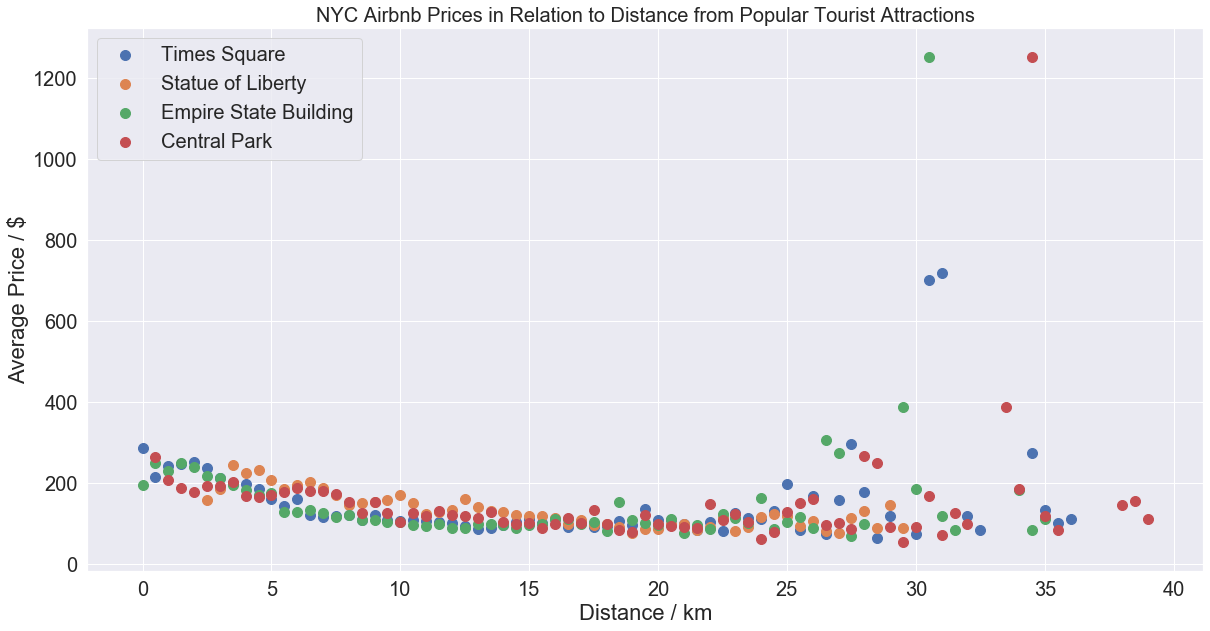

In [85]:
# ANALYSIS: starting with how price varies according to distance from the tourist attractions

tourist_spots = ['Times Square', 'Statue of Liberty', 'Empire State Building', 'Central Park']
tourist_data = [TS_dist_grouped_mean, SoL_dist_grouped_mean, ESB_dist_grouped_mean, CentP_dist_grouped_mean]

# control font sizes in plots:

SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## individual plots for each destination:

# for i in range(0, len(tourist_data)):
#     plt.scatter(tourist_data[i].index, tourist_data[i]['price'])
#     title = 'Airbnb Price in Relation to Distance from ' + tourist_spots[i]
#     plt.title(title)
#     xlabel = 'Distance from ' + tourist_spots[i] + ' / km'
#     plt.xlabel(xlabel)
#     plt.ylabel('Average Price / $')
#     plt.show()
    
# combined plot for all destinations

plt.figure(figsize = (20, 10))
plt.scatter(TS_dist_grouped_mean.index, TS_dist_grouped_mean['price'], s = 100)
plt.scatter(SoL_dist_grouped_mean.index, SoL_dist_grouped_mean['price'], s = 100)
plt.scatter(ESB_dist_grouped_mean.index, ESB_dist_grouped_mean['price'], s = 100)
plt.scatter(CentP_dist_grouped_mean.index, CentP_dist_grouped_mean['price'], s = 100)
# plt.xticks(range(0, 41))
plt.title('NYC Airbnb Prices in Relation to Distance from Popular Tourist Attractions')
plt.xlabel('Distance / km')
plt.ylabel('Average Price / $')
plt.legend(tourist_spots, loc = 'upper left')
plt.show()

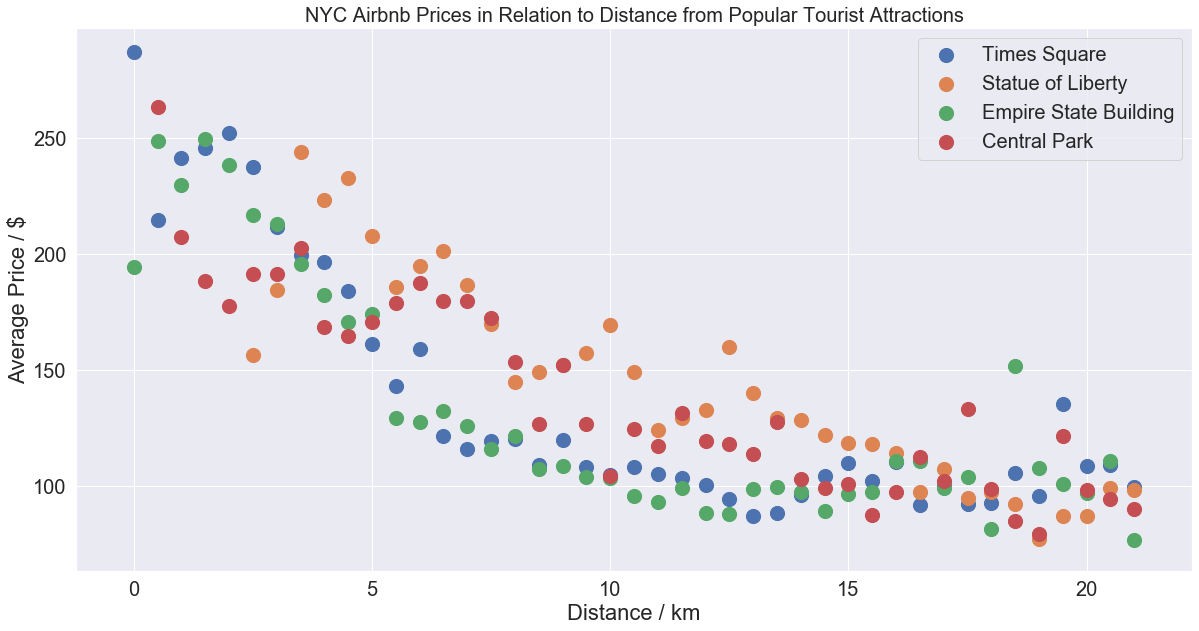

In [86]:
# focusing on the closest ~ 20 km

plt.figure(figsize = (20, 10))
plt.scatter(TS_dist_grouped_mean[:21].index, TS_dist_grouped_mean[:21]['price'], s = 200)
plt.scatter(SoL_dist_grouped_mean[:21].index, SoL_dist_grouped_mean[:21]['price'], s = 200)
plt.scatter(ESB_dist_grouped_mean[:21].index, ESB_dist_grouped_mean[:21]['price'], s = 200)
plt.scatter(CentP_dist_grouped_mean[:21].index, CentP_dist_grouped_mean[:21]['price'], s = 200)
plt.title('NYC Airbnb Prices in Relation to Distance from Popular Tourist Attractions')
plt.xlabel('Distance / km')
plt.ylabel('Average Price / $')
plt.legend(tourist_spots, loc = 'upper right')
plt.show()

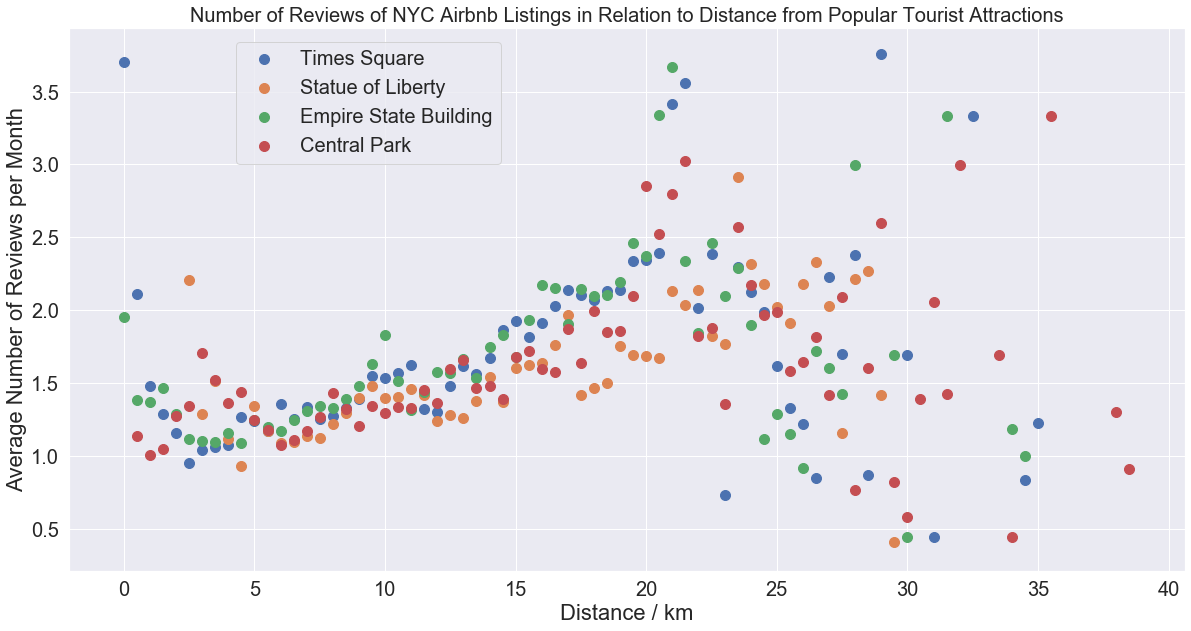

In [87]:
# and comparing number of reviews/how busy listings are compared to distance

plt.figure(figsize = (20, 10))
plt.scatter(TS_dist_grouped_mean.index, TS_dist_grouped_mean['reviews_per_month'], s = 100)
plt.scatter(SoL_dist_grouped_mean.index, SoL_dist_grouped_mean['reviews_per_month'], s = 100)
plt.scatter(ESB_dist_grouped_mean.index, ESB_dist_grouped_mean['reviews_per_month'], s = 100)
plt.scatter(CentP_dist_grouped_mean.index, CentP_dist_grouped_mean['reviews_per_month'], s = 100)
plt.title('Number of Reviews of NYC Airbnb Listings in Relation to Distance from Popular Tourist Attractions')
plt.xlabel('Distance / km')
plt.ylabel('Average Number of Reviews per Month')
plt.legend(tourist_spots, loc = (0.15, 0.75))
plt.show()

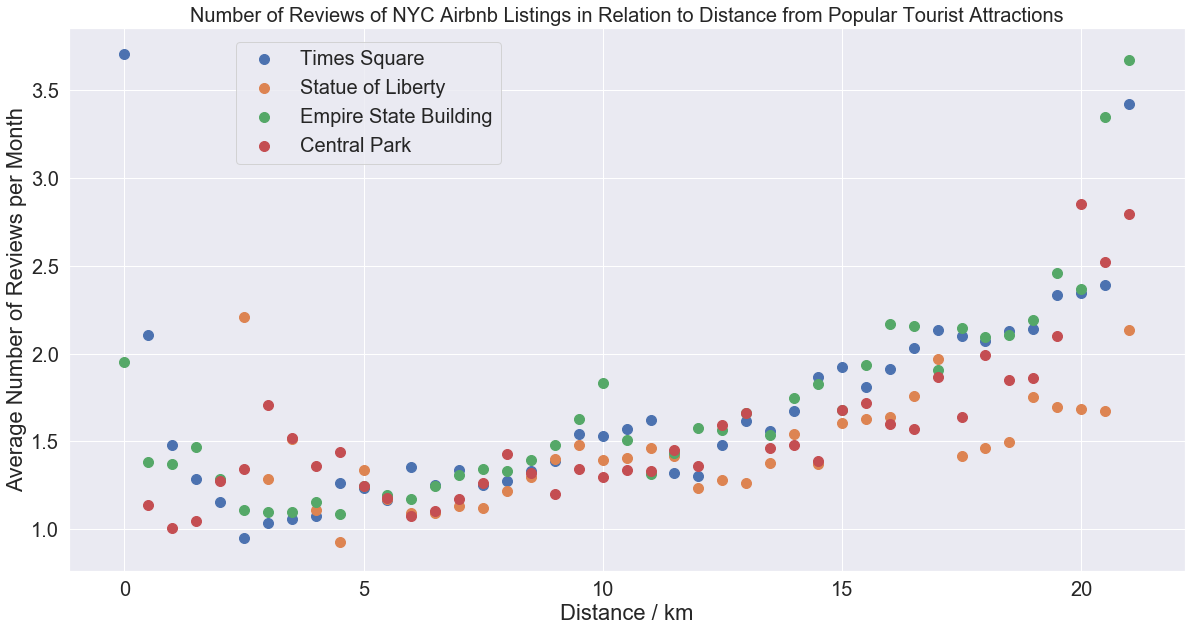

In [88]:
plt.figure(figsize = (20, 10))
plt.scatter(TS_dist_grouped_mean[:21].index, TS_dist_grouped_mean[:21]['reviews_per_month'], s = 100)
plt.scatter(SoL_dist_grouped_mean[:21].index, SoL_dist_grouped_mean[:21]['reviews_per_month'], s = 100)
plt.scatter(ESB_dist_grouped_mean[:21].index, ESB_dist_grouped_mean[:21]['reviews_per_month'], s = 100)
plt.scatter(CentP_dist_grouped_mean[:21].index, CentP_dist_grouped_mean[:21]['reviews_per_month'], s = 100)
plt.title('Number of Reviews of NYC Airbnb Listings in Relation to Distance from Popular Tourist Attractions')
plt.xlabel('Distance / km')
plt.ylabel('Average Number of Reviews per Month')
plt.legend(tourist_spots, loc = (0.15, 0.75))
plt.show()

# Discussion

So an increase in average price as listings are located closer to popular tourist attractions, but the trend falls off past 20 or so km. 

Similarly, the most visited/trafficked listings are also closer to the attractions, but this trend falls off sooner, after the first 5 km, and inverts.

Unclear trends in this analysis may be due to the nature of the distance calculation used. Geodesic distances are (an approximation of) the most direct path between two points on the Earth, and do not take into account road layout, traffic, or the existence of footpaths, which could all influence the actual travel time.

They also do not take into account the proximity of listings to public transport like metro stations.

# 2. Which neighbourhoods have the most listings? How does this correlate with price and traffic?

In [151]:
# Determine the average price, number of visits, and number, of listings within each neighbourhood group.
# assume code is ran separately from above

data2 = pd.read_csv(r'D:\Dropbox\Dropbox\Python\Python Practice\Pandas Projects\New_York_Airbnb\AB_NYC_2019.csv')

print('There are', data2.neighbourhood_group.nunique(), 'neighbourhood groups, and', 
      data2.neighbourhood.nunique(), 'neighbourhoods.')

# 221 neighbourhoods! we'll stick to analysing them by group

data2 = data2.drop(['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude', 'neighbourhood', 'room_type',
                  'minimum_nights', 'last_review', 'number_of_reviews', 'calculated_host_listings_count', 
                  'availability_365'], axis = 1)

# groupby neighbourhood group and calculate mean price and no. reviews per month
neighbourhood_grouped = data2.groupby('neighbourhood_group').mean().reset_index()
# extract number of listings per neighbourhood group, then merge it on to the previous dataframe
number_of_listings = data2.neighbourhood_group.value_counts().to_frame().reset_index()

number_of_listings = number_of_listings.rename(columns={'neighbourhood_group':'listings', 
                                                        'index':'neighbourhood_group'})

neighbourhood_grouped = neighbourhood_grouped.merge(number_of_listings, on = 'neighbourhood_group', how = 'inner')

neighbourhood_grouped = neighbourhood_grouped.set_index('neighbourhood_group').sort_values('price', 
                                                                                           ascending = False)

neighbourhood_grouped

There are 5 neighbourhood groups, and 221 neighbourhoods.


,price,reviews_per_month,listings
neighbourhood_group,,,
Manhattan,196.875814,1.272131,21661
Brooklyn,124.383207,1.283212,20104
Staten Island,114.812332,1.872580,373
Queens,99.517649,1.941200,5666
Bronx,87.496792,1.837831,1091


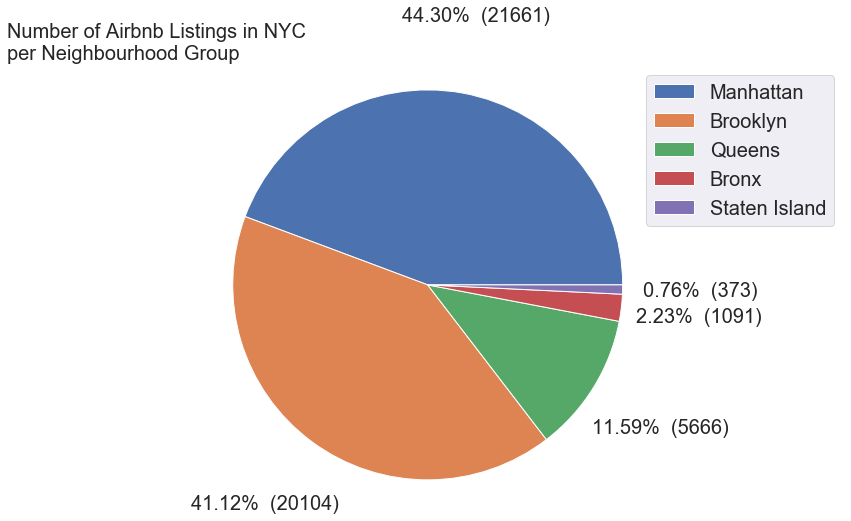

In [89]:
# plot number of listings by neighbourhood group as pie chart

neighbourhood_groups = number_of_listings.neighbourhood_group.unique()
values = number_of_listings.listings.values

# to get absolute number of listings as well as percentage of total in pie chart labels:
# autopct automatically makes percentages, this function converts them to their absolute values and returns both, formatted
def make_autopct(values):
    def my_autopct(pct): 
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.figure(figsize = (15, 8))
plt.pie(values, autopct = make_autopct(values), pctdistance = 1.4)
plt.axis('equal')
plt.title('Number of Airbnb Listings in NYC \nper Neighbourhood Group', loc = 'left')        
plt.legend(neighbourhood_groups)
plt.show()

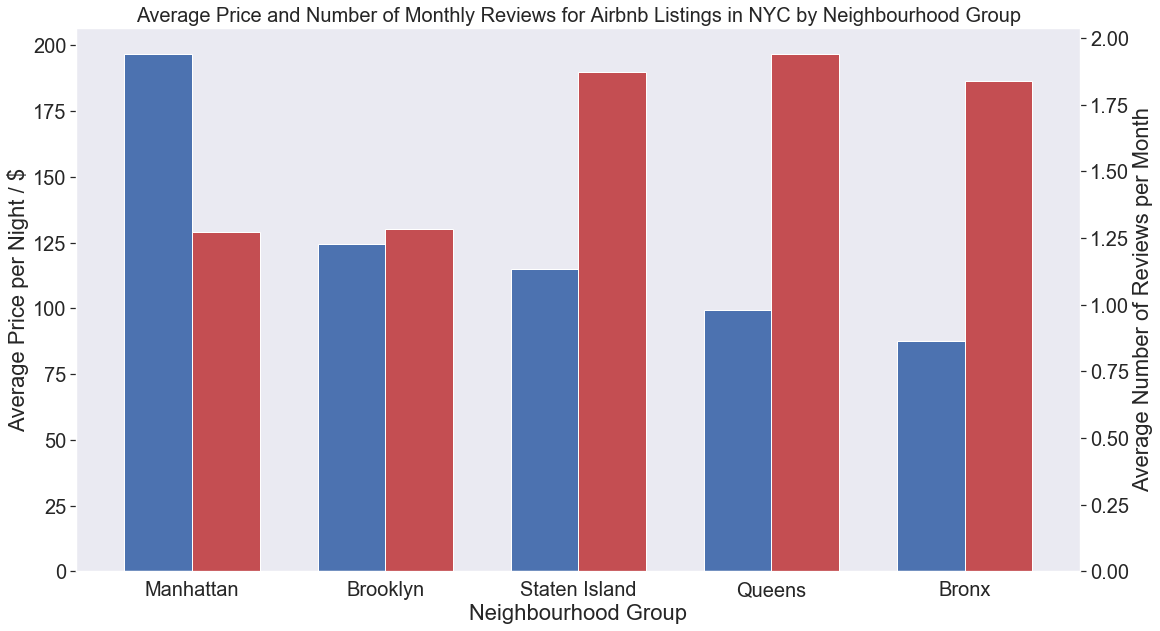

In [112]:
# Find the average price and number of visits of listings within each neighbourhood group.
# sorted by price, descending

fig = plt.figure(figsize = (18, 10))

ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = 0.35

neighbourhood_grouped.price.plot(kind = 'bar', color = 'b', ax = ax, width = width, position = 1,
    title = 'Average Price and Number of Monthly Reviews for Airbnb Listings in NYC by Neighbourhood Group')
neighbourhood_grouped.reviews_per_month.plot(kind = 'bar', color = 'r', ax = ax2, width = width, position = 0)

# make xticklabels horizontal rather than vertical
ax.set_xticklabels(neighbourhood_grouped.index, rotation = 0)

ax.set_ylabel('Average Price per Night / $')
ax2.set_ylabel('Average Number of Reviews per Month')
ax.set_xlabel('Neighbourhood Group')

# remove grids - visually confusing with 2 y axes
ax.grid(None)
ax2.grid(None)

plt.xlim(-0.6)
plt.show()

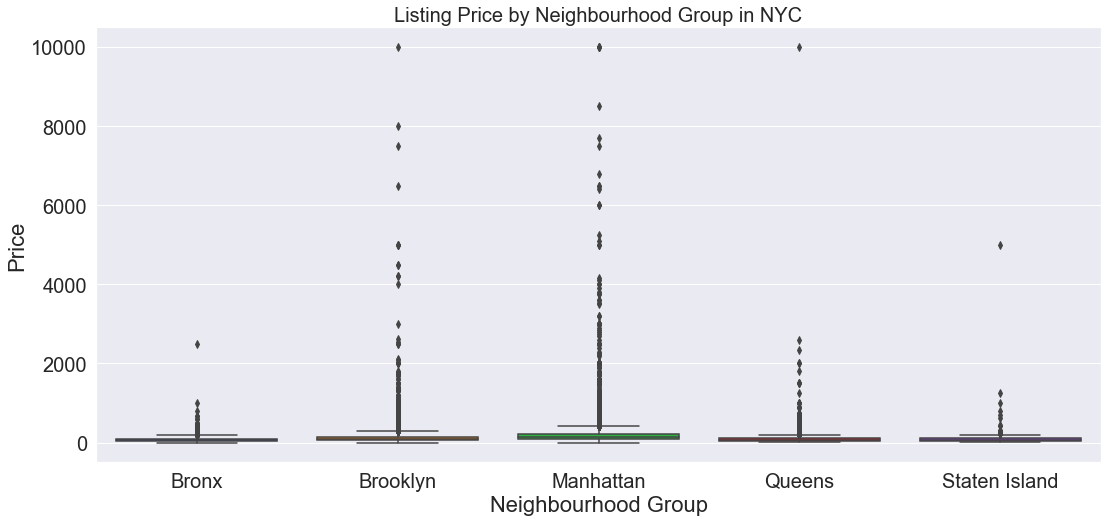

In [247]:
# plot price and number of reviews as box plots
# sorting alphabetically for ease

data2.sort_values('neighbourhood_group', inplace = True)

df = pd.DataFrame({'Neighbourhood Group': ['Bronx'] * len(data2[data2.neighbourhood_group == 'Bronx']) 
+ ['Brooklyn'] * len(data2[data2.neighbourhood_group == 'Brooklyn']) 
+ ['Manhattan'] * len(data2[data2.neighbourhood_group == 'Manhattan']) 
+ ['Queens'] * len(data2[data2.neighbourhood_group == 'Queens']) 
+ ['Staten Island'] * len(data2[data2.neighbourhood_group == 'Staten Island']),
                  
                  'Price': data2.price.values})

plt.figure(figsize = (18, 8))
sns.boxplot(data = df, x = 'Neighbourhood Group', y = 'Price')
plt.title('Listing Price by Neighbourhood Group in NYC')
plt.show()

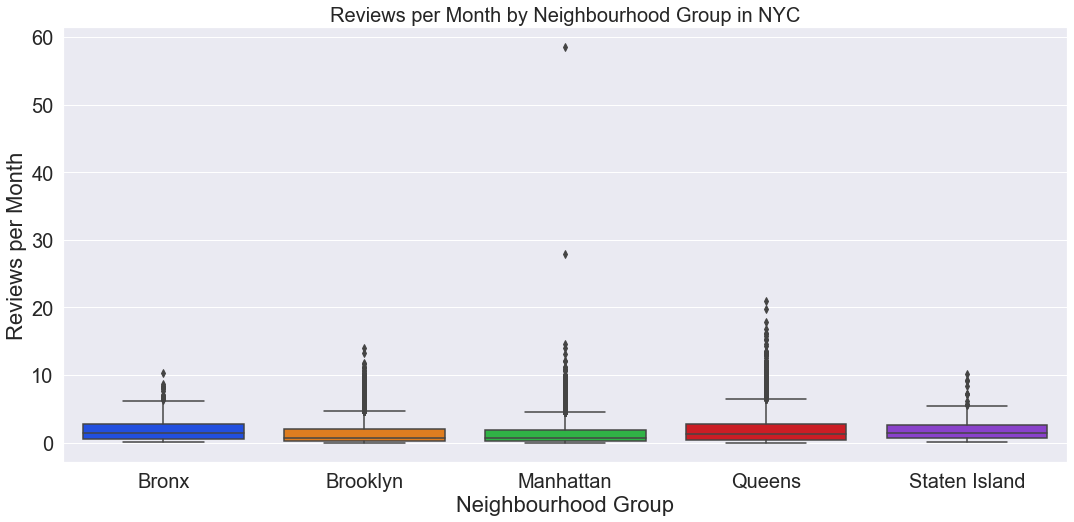

In [246]:
df2 = pd.DataFrame({'Neighbourhood Group': ['Bronx'] * len(data2[data2.neighbourhood_group == 'Bronx']) 
+ ['Brooklyn'] * len(data2[data2.neighbourhood_group == 'Brooklyn']) 
+ ['Manhattan'] * len(data2[data2.neighbourhood_group == 'Manhattan']) 
+ ['Queens'] * len(data2[data2.neighbourhood_group == 'Queens']) 
+ ['Staten Island'] * len(data2[data2.neighbourhood_group == 'Staten Island']),
                  
                  'Reviews per Month': data2.reviews_per_month.values})

plt.figure(figsize = (18, 8))
sns.boxplot(data = df2, x = 'Neighbourhood Group', y = 'Reviews per Month')
plt.title('Reviews per Month by Neighbourhood Group in NYC')
plt.show()

In [182]:
# explicitly print all these aggregates for price:

for i, ng in enumerate(neighbourhood_groups):
    
    if i == 0:
        ng_df = df[df['Neighbourhood Group'] == ng].describe()
        
    else:
        ng_df = ng_df.merge(df[df['Neighbourhood Group'] == ng].describe(), left_index = True, right_index = True)
        
ng_df.columns = neighbourhood_groups
ng_df.columns.name = 'Price'
ng_df

Price,Bronx,Brooklyn,Manhattan,Queens,Staten Island
count,1091.000000,20104.000000,21661.000000,5666.000000,373.000000
mean,87.496792,124.383207,196.875814,99.517649,114.812332
std,106.709349,186.873538,291.383183,167.102155,277.620403
min,0.000000,0.000000,0.000000,10.000000,13.000000
25%,45.000000,60.000000,95.000000,50.000000,50.000000
50%,65.000000,90.000000,150.000000,75.000000,75.000000
75%,99.000000,150.000000,220.000000,110.000000,110.000000
max,2500.000000,10000.000000,10000.000000,10000.000000,5000.000000


In [183]:
# and for reviews per month:

for i, ng in enumerate(neighbourhood_groups):
    
    if i == 0:
        ng_df2 = df2[df2['Neighbourhood Group'] == ng].describe()
        
    else:
        ng_df2 = ng_df.merge(df2[df2['Neighbourhood Group'] == ng].describe(), left_index = True, right_index = True)
        
ng_df.columns = neighbourhood_groups
ng_df.columns.name = 'Reviews per Month'
ng_df

Reviews per Month,Bronx,Brooklyn,Manhattan,Queens,Staten Island
count,1091.000000,20104.000000,21661.000000,5666.000000,373.000000
mean,87.496792,124.383207,196.875814,99.517649,114.812332
std,106.709349,186.873538,291.383183,167.102155,277.620403
min,0.000000,0.000000,0.000000,10.000000,13.000000
25%,45.000000,60.000000,95.000000,50.000000,50.000000
50%,65.000000,90.000000,150.000000,75.000000,75.000000
75%,99.000000,150.000000,220.000000,110.000000,110.000000
max,2500.000000,10000.000000,10000.000000,10000.000000,5000.000000


# Discussion

So the most visited/trafficked listings (by average number of monthly reviews) are those in the cheaper neighbourhood groups. This is of course assuming that the number of people booking a listing is directly proportional to the number of people reviewing it. Not everyone reviews in reality!

Despite listings in cheaper neighbourhoods being busier, the more expensive neighbourhood groups have a far higher number of listings. This suggests that the reason for the fewer visiters per listing in Manhattan and Brooklyn is simply a matter of them having a LOT more choice.

Brooklyn and Manhattan have very similar numbers of listings and reviews, even though Manhattan listings are nearly twice the price on average. This is likely due to proximity to popular tourist attractions.

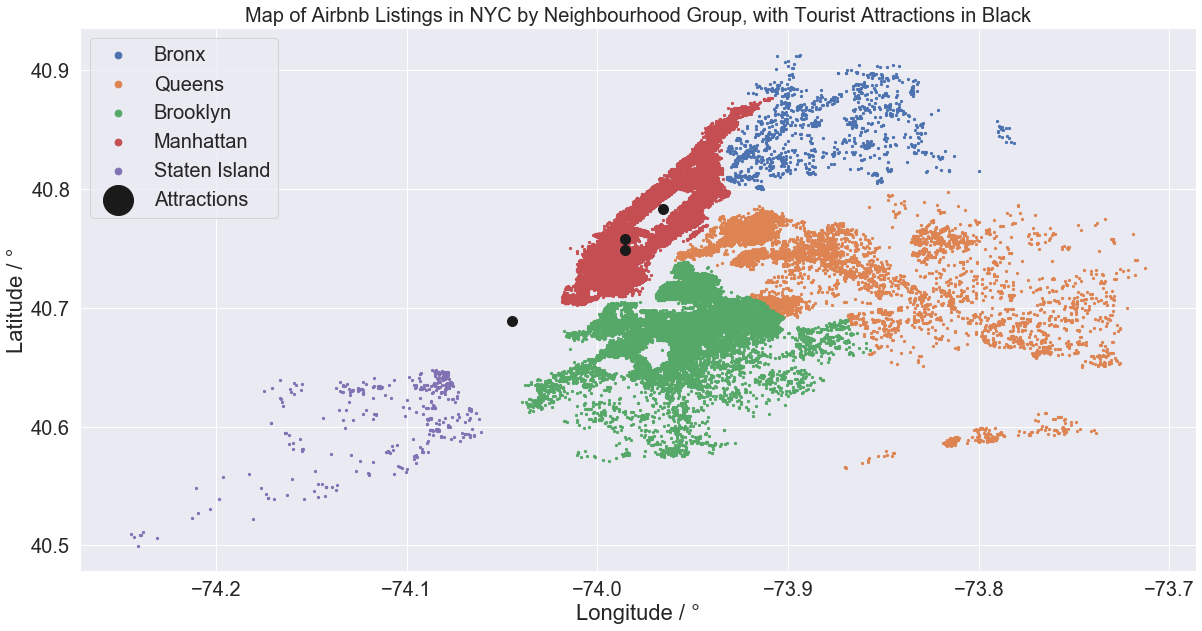

In [113]:
# BONUS: plot the actual coordinates of each listing, coloured by neighbourhood group, 
# as well as the tourist attractions

listings_data = pd.read_csv(r'D:\Dropbox\Dropbox\Python\Python Practice\Pandas Projects\New_York_Airbnb\AB_NYC_2019.csv')

listings_data = listings_data.drop(['id', 'name', 'host_id', 'host_name', 'price', 'reviews_per_month', 'neighbourhood', 'room_type', 
                  'minimum_nights', 'last_review', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365'], axis = 1)

# set coordinates for popular NYC tourist attractions
times_square = (40.7580, -73.9855)
statue_of_liberty = (40.6892, -74.0445)
empire_state = (40.7484, -73.9857)
central_park = (40.7829, -73.9654) # presumably the centre of the park

attractions_lat = (times_square[0], statue_of_liberty[0], empire_state[0], central_park[0])
attractions_long = (times_square[1], statue_of_liberty[1], empire_state[1], central_park[1])

listings_data = listings_data.sort_values('neighbourhood_group')

legend = ('Bronx', 'Queens', 'Brooklyn', 'Manhattan', 'Staten Island', 'Attractions')

plt.figure(figsize = (20,10))
# plt.scatter(listings_data['longitude'], listings_data['latitude'])
plt.scatter(listings_data[listings_data['neighbourhood_group'] == 'Bronx']['longitude'], listings_data[listings_data['neighbourhood_group'] == 'Bronx']['latitude'], s = 5)
plt.scatter(listings_data[listings_data['neighbourhood_group'] == 'Queens']['longitude'], listings_data[listings_data['neighbourhood_group'] == 'Queens']['latitude'], s = 5)
plt.scatter(listings_data[listings_data['neighbourhood_group'] == 'Brooklyn']['longitude'], listings_data[listings_data['neighbourhood_group'] == 'Brooklyn']['latitude'], s = 5)
plt.scatter(listings_data[listings_data['neighbourhood_group'] == 'Manhattan']['longitude'], listings_data[listings_data['neighbourhood_group'] == 'Manhattan']['latitude'], s = 5)
plt.scatter(listings_data[listings_data['neighbourhood_group'] == 'Staten Island']['longitude'], listings_data[listings_data['neighbourhood_group'] == 'Staten Island']['latitude'], s = 5)
plt.scatter(attractions_long, attractions_lat, s = 100, color = 'k')
plt.xlabel('Longitude / °')
plt.ylabel('Latitude / °')
plt.title('Map of Airbnb Listings in NYC by Neighbourhood Group, with Tourist Attractions in Black')
plt.legend(legend, loc = 'upper left', markerscale = 3.)
plt.show()

# 3. Listings in which price range are the busiest?

In [197]:
data3 = pd.read_csv(r'D:\Dropbox\Dropbox\Python\Python Practice\Pandas Projects\New_York_Airbnb\AB_NYC_2019.csv')

data3 = data3.drop(['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude', 'neighbourhood', 'room_type',
                  'minimum_nights', 'last_review', 'number_of_reviews', 'calculated_host_listings_count', 
                  'availability_365'], axis = 1)

# bin listing prices 
data3['price_range'] = pd.cut(data3.price, 10)

print(data3.head())
print()
data3.price_range.value_counts()

  neighbourhood_group  price  reviews_per_month      price_range
0            Brooklyn    149               0.21  (-10.0, 1000.0]
1           Manhattan    225               0.38  (-10.0, 1000.0]
2           Manhattan    150                NaN  (-10.0, 1000.0]
3            Brooklyn     89               4.64  (-10.0, 1000.0]
4           Manhattan     80               0.10  (-10.0, 1000.0]



(-10.0, 1000.0]      48656
(1000.0, 2000.0]       153
(2000.0, 3000.0]        41
(3000.0, 4000.0]        13
(4000.0, 5000.0]        12
(9000.0, 10000.0]        6
(6000.0, 7000.0]         5
(7000.0, 8000.0]         4
(5000.0, 6000.0]         4
(8000.0, 9000.0]         1
Name: price_range, dtype: int64

# It was here that I realised that the price column had some... strange values in it.

Namely it had values as high as \\$10,000 per night, or as low as \\$0: free!

It also had really low values like \\$10 a night in Manhattan, so the simple assumption that the \\$0 prices were just mistakes that could be dropped is flawed.

These listings also had non-zero numbers of reviews, so they are evidently real, and in use.

In [198]:
print('Highest price per night is: $', data3.price.max())
print('Lowest price per night is: $', data3.price.min())
print()
print(data3[data3['price'] == 0].head())
print()
print(data3[data3['price'] == 10000].head())
print()
print(data3[data3['price'] <= 10].head())

Highest price per night is: $ 10000
Lowest price per night is: $ 0

      neighbourhood_group  price  reviews_per_month      price_range
23161            Brooklyn      0               0.05  (-10.0, 1000.0]
25433               Bronx      0               2.56  (-10.0, 1000.0]
25634            Brooklyn      0               0.71  (-10.0, 1000.0]
25753            Brooklyn      0               0.53  (-10.0, 1000.0]
25778            Brooklyn      0               0.15  (-10.0, 1000.0]

      neighbourhood_group  price  reviews_per_month        price_range
9151               Queens  10000               0.04  (9000.0, 10000.0]
17692            Brooklyn  10000               0.16  (9000.0, 10000.0]
29238           Manhattan  10000                NaN  (9000.0, 10000.0]

      neighbourhood_group  price  reviews_per_month      price_range
2860            Manhattan     10                NaN  (-10.0, 1000.0]
21700           Manhattan     10                NaN  (-10.0, 1000.0]
22261            Brooklyn

Plotting the number of listings with each price:


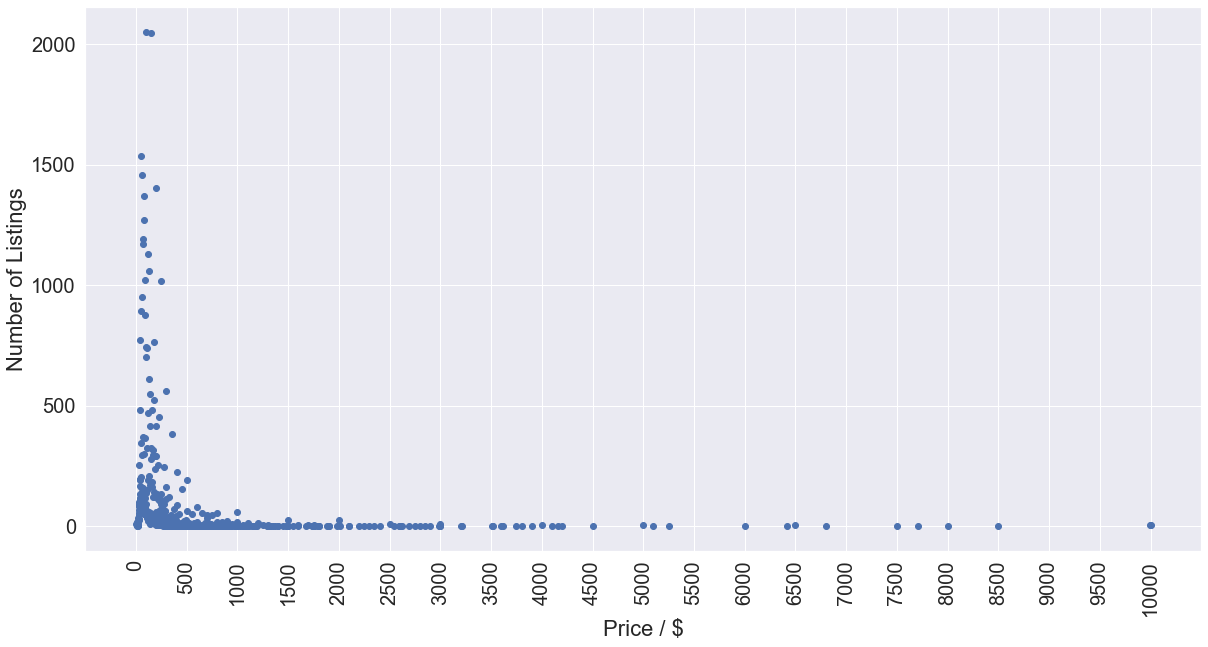

And focusing on the most popular range of prices (by eye):


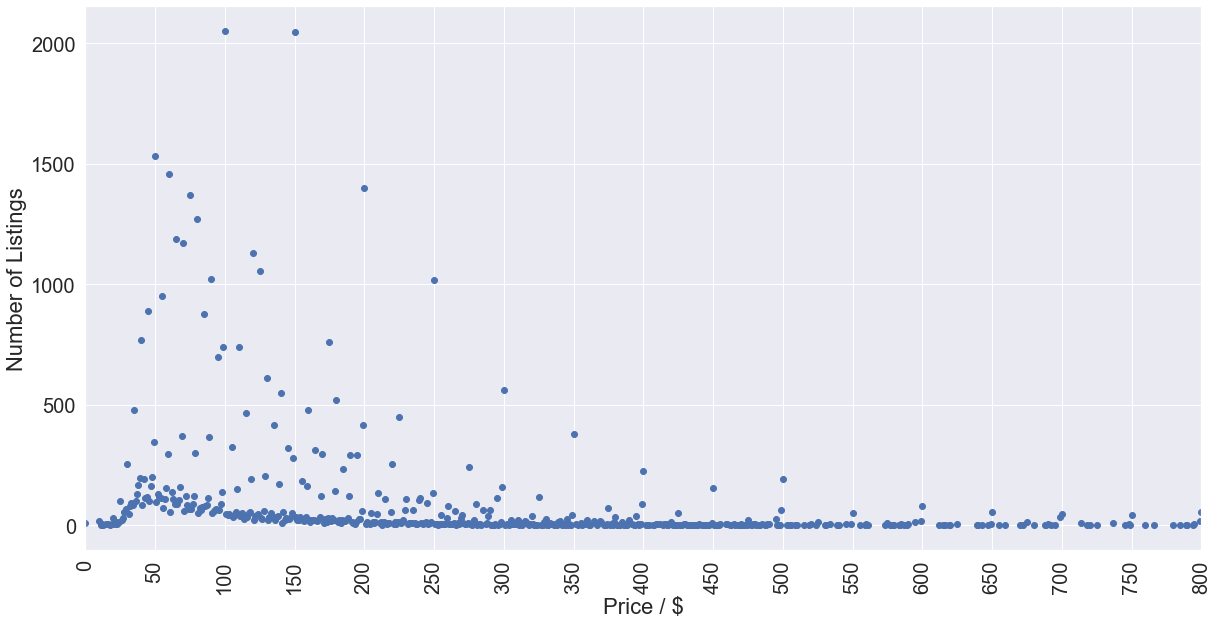

And focusing on the prices near $0:


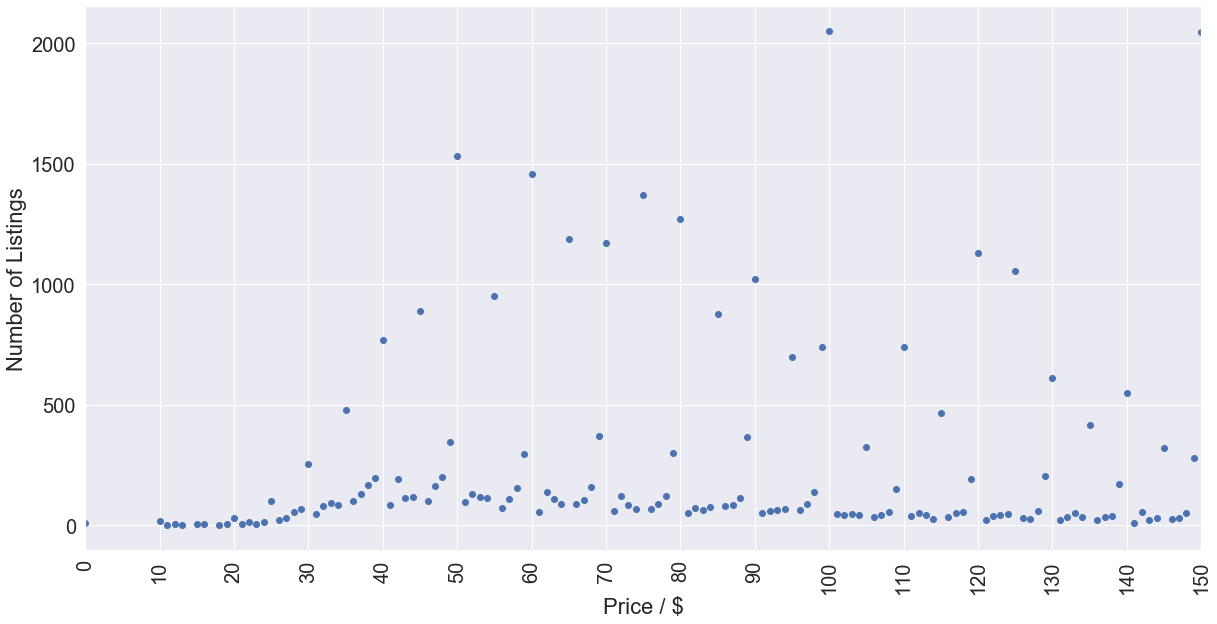

In [199]:
# plot prices without binning to get a quick idea of how they are distributed

print('Plotting the number of listings with each price:')
plt.figure(figsize = (20,10))
plt.scatter(list(data3.price.value_counts().index), list(data3.price.value_counts().values))
plt.xlabel('Price / $')
plt.ylabel('Number of Listings')
plt.xticks(range(0, 10500, 500), rotation = 'vertical')
plt.show()

print('And focusing on the most popular range of prices (by eye):')
plt.figure(figsize = (20,10))
plt.scatter(list(data3.price.value_counts().index), list(data3.price.value_counts().values))
plt.xlabel('Price / $')
plt.ylabel('Number of Listings')
plt.xlim(0, 600)
plt.xticks(range(0, 850, 50), rotation = 'vertical')
plt.show()

print('And focusing on the prices near $0:')
plt.figure(figsize = (20,10))
plt.scatter(list(data3.price.value_counts().index), list(data3.price.value_counts().values))
plt.xlabel('Price / $')
plt.ylabel('Number of Listings')
plt.xlim(0, 150)
plt.xticks(range(0, 160, 10), rotation = 'vertical')
plt.show()

# Decided to therefore bin the prices in bins of size \\$50, dropping everything above \\$1000

This does not address the weirdness of prices as low as \\$0 or \\$10, but that would require talking to the people at Airbnb to understand!

The good news is that the weird prices (high and low) are all low in frequency, so they shouldn't skew the statistics of the 0-50 box too much.

In [216]:
# Bin the prices:

# initalise list to contain bin ranges
# using -1 for first bound of first bin to ensure that values of $0 are included (bins are closed on right)
list_of_tuples = [(-1, 50)]

# add remaining bins of size 50 across range 50-800
for i in range(50, 1000, 50):
    list_of_tuples.append((i, i+50))

# convert to interval index 
bins = pd.IntervalIndex.from_tuples(list_of_tuples)

# bin using pd.cut()
data3['price_range'] = pd.cut(data3['price'], bins)
    
print(data3.head())

# group by price range
price_range_grouped = data3.groupby('price_range').mean()

price_range_grouped

  neighbourhood_group  price  reviews_per_month price_range
0            Brooklyn    149               0.21  (100, 150]
1           Manhattan    225               0.38  (200, 250]
2           Manhattan    150                NaN  (100, 150]
3            Brooklyn     89               4.64   (50, 100]
4           Manhattan     80               0.10   (50, 100]


,price,reviews_per_month
price_range,,
"(-1, 50]",41.897881,1.375885
"(50, 100]",77.661657,1.486752
"(100, 150]",129.840961,1.296257
"(150, 200]",181.513427,1.259308
"(200, 250]",233.920970,1.220758
"(250, 300]",285.267963,1.407766
"(300, 350]",336.043285,1.514459
"(350, 400]",387.496392,1.298514
"(400, 450]",437.340557,1.388694


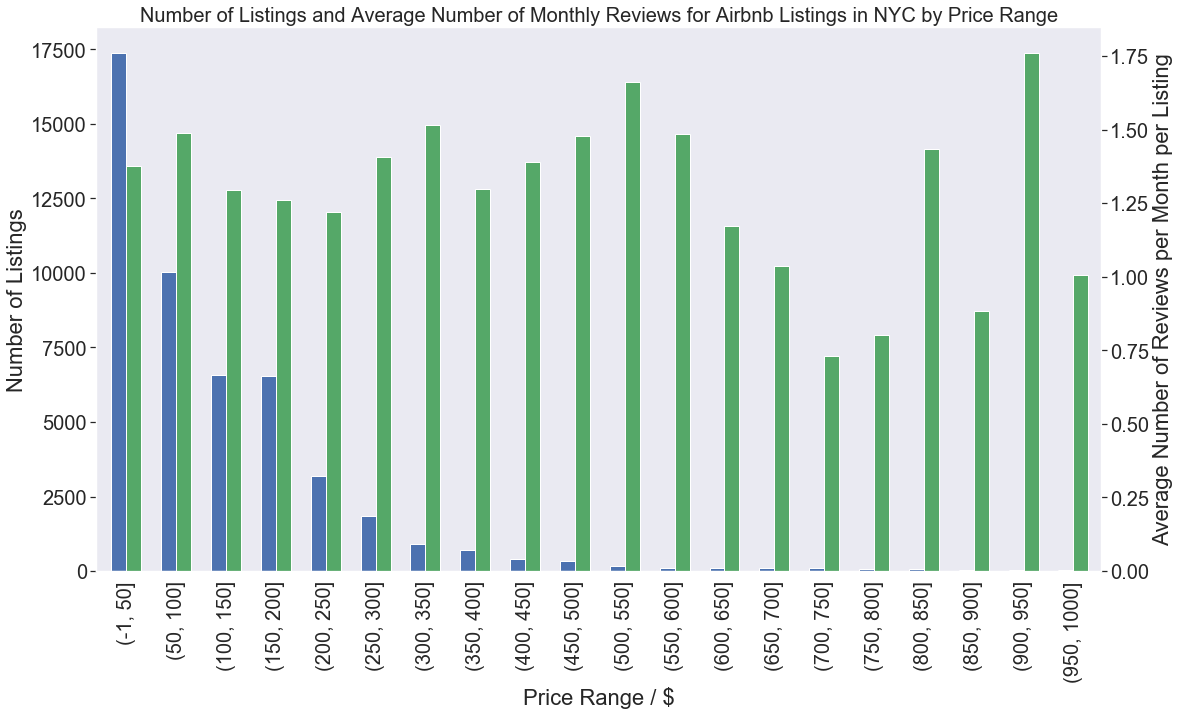

In [217]:
# back to the question: listings in which price range are the most popular/busy?
# plot number of listings vs average number of monthly reviews for each price range

fig = plt.figure(figsize = (18, 10))

ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = 0.3

data3.price_range.value_counts().plot(kind = 'bar', color = 'b', ax = ax, width = width, position = 1,
    title = 'Number of Listings and Average Number of Monthly Reviews for Airbnb Listings in NYC by Price Range')
price_range_grouped.reviews_per_month.plot(kind = 'bar', color = 'g', ax = ax2, width = width, position = 0)

ax.set_ylabel('Number of Listings')
ax2.set_ylabel('Average Number of Reviews per Month per Listing')
ax.set_xlabel('Price Range / $')

ax.grid(None)
ax2.grid(None)

plt.xlim(-0.6)
plt.show()

An alternative approach to histograms is KDE plots, which avoid the problem of having discrete bins. The further clarity afforded by these allow separation by neighbourhood group again.

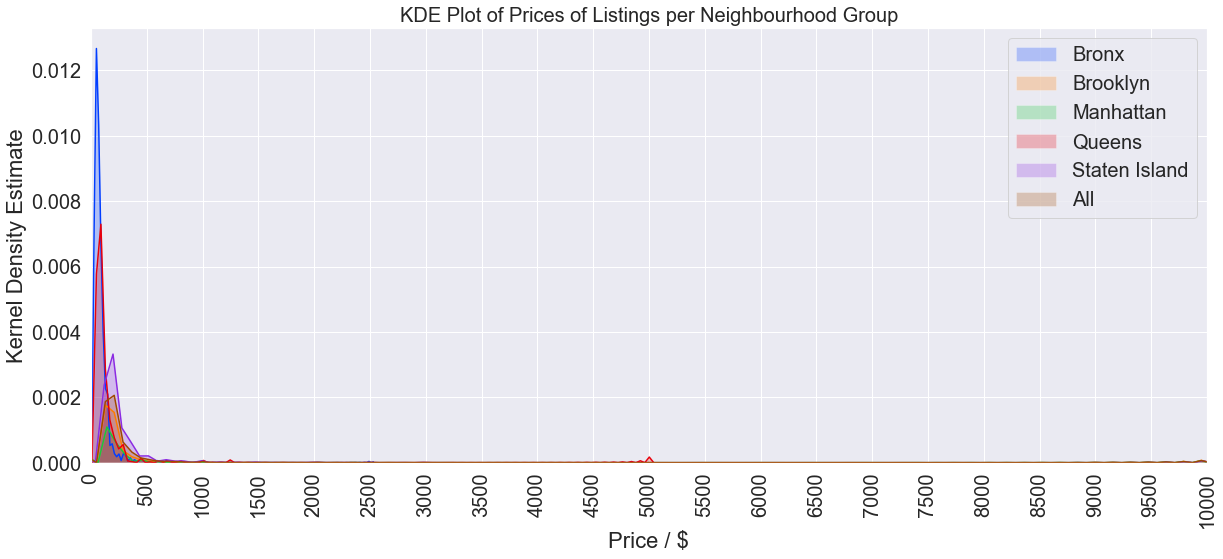

In [244]:
# KDE plot of listing prices per neighbourhood group

plt.figure(figsize = (20, 8))

palette = sns.color_palette('bright')
sns.set_palette(palette)

sns.kdeplot(data3[data3.neighbourhood_group == 'Bronx'].price.values, shade = True)
sns.kdeplot(data3[data3.neighbourhood_group == 'Brooklyn'].price.values, shade = True)
sns.kdeplot(data3[data3.neighbourhood_group == 'Queens'].price.values, shade = True)
sns.kdeplot(data3[data3.neighbourhood_group == 'Staten Island'].price.values, shade = True)
sns.kdeplot(data3[data3.neighbourhood_group == 'Manhattan'].price.values, shade = True)
sns.kdeplot(data3.price.values, shade = True)

plt.ylabel('Kernel Density Estimate')
plt.xlabel('Price / $')
plt.title('KDE Plot of Prices of Listings per Neighbourhood Group')
plt.legend(np.append(neighbourhood_groups, ['All']))

plt.xticks(range(0, 10500, 500), rotation = 90)
plt.xlim(0, 10000)

plt.show()

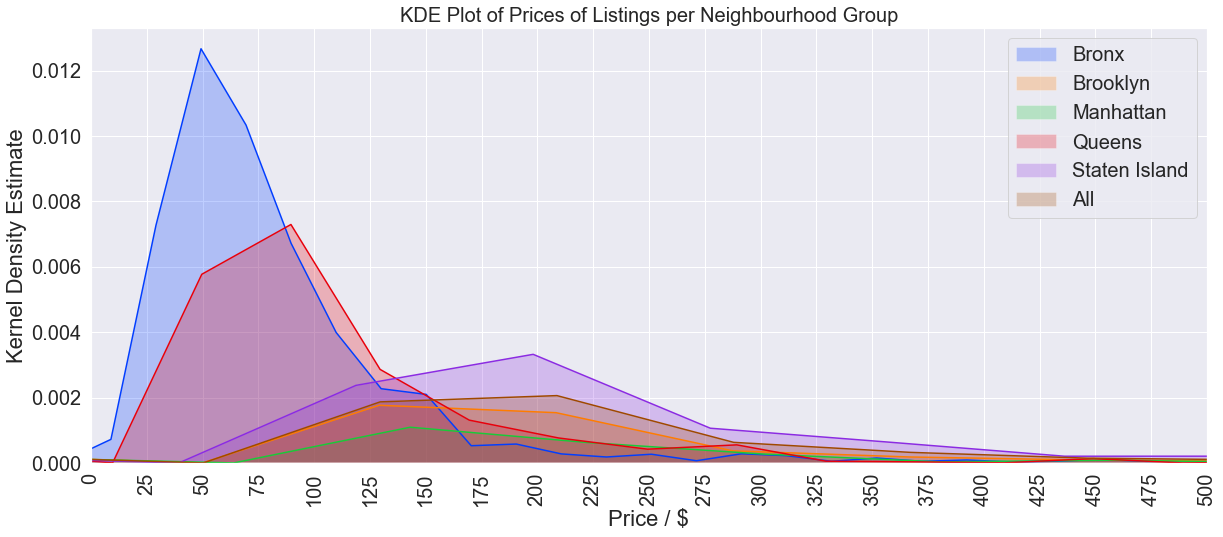

In [245]:
# same plot, zoomed in on the bulk of listings 

plt.figure(figsize = (20, 8))

sns.kdeplot(data3[data3.neighbourhood_group == 'Bronx'].price.values, shade = True)
sns.kdeplot(data3[data3.neighbourhood_group == 'Brooklyn'].price.values, shade = True)
sns.kdeplot(data3[data3.neighbourhood_group == 'Queens'].price.values, shade = True)
sns.kdeplot(data3[data3.neighbourhood_group == 'Staten Island'].price.values, shade = True)
sns.kdeplot(data3[data3.neighbourhood_group == 'Manhattan'].price.values, shade = True)
sns.kdeplot(data3.price.values, shade = True)

plt.ylabel('Kernel Density Estimate')
plt.xlabel('Price / $')
plt.title('KDE Plot of Prices of Listings per Neighbourhood Group')
plt.legend(np.append(neighbourhood_groups, ['All']))

plt.xticks(range(0, 550, 25), rotation = 90)
plt.xlim(0, 500)

plt.show()

Can also use violin plots, which combine the best part of KDE plots with box plots.

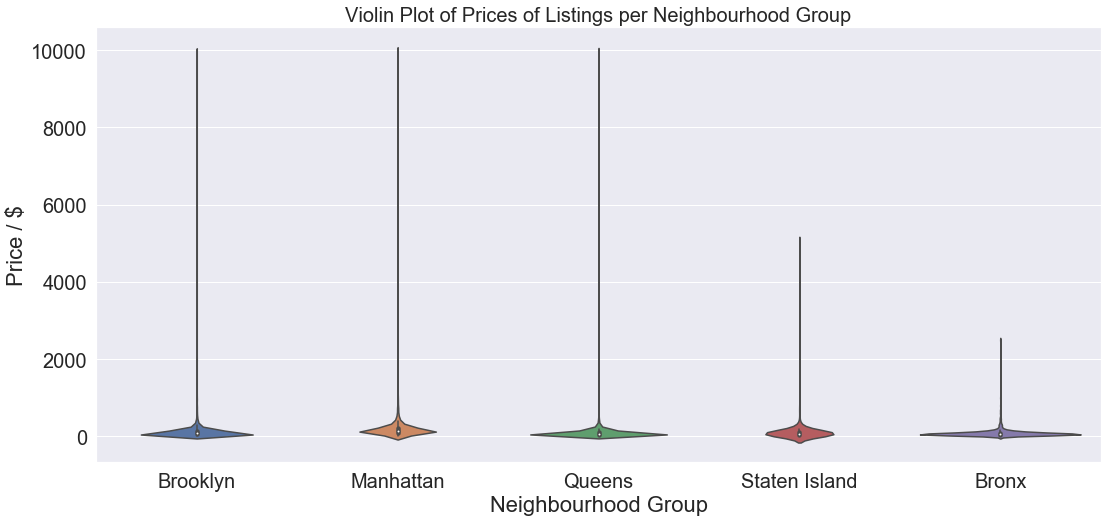

In [237]:
plt.figure(figsize = (18, 8))

sns.violinplot(data = data3, x = 'neighbourhood_group', y = 'price')

plt.xlabel('Neighbourhood Group')
plt.ylabel('Price / $')
plt.title('Violin Plot of Prices of Listings per Neighbourhood Group')

plt.show()

# Discussion

So what we see is that the average number of monthly reviews per listing seem to be broadly independent of the number of listings, across most price ranges.

The MOST expensive listings (\\$650+) do seem to receive about half the traffic of the cheaper listings, but this does not hold true for those in the \\$800-850 and \\$900-950 bin, the latter of which has the most reviewed listings on average!

Will emphasise here that we did not have any information in the dataset about how many people each listing is intended for, so it may be that we are comparing those which are intended for larger groups (and therefore have more expensive bills to be shared) to those meant for fewer people. This may explain the similarities in business, despite the high price tags on some listings. We have no way of knowing this from this data.

# 4. What is the cheapest type of listing? What is the most popular?

In [218]:
data4 = pd.read_csv(r'D:\Dropbox\Dropbox\Python\Python Practice\Pandas Projects\New_York_Airbnb\AB_NYC_2019.csv')

data4 = data4.drop(['id', 'name', 'host_id', 'latitude', 'longitude', 'host_name', 'neighbourhood', 
                  'minimum_nights', 'last_review', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365'], axis = 1)

room_type_grouped = data4.groupby(['room_type', 'neighbourhood_group']).mean().sort_values('price', ascending = False)

room_type_grouped

price  reviews_per_month
room_type       neighbourhood_group                               
Entire home/apt Manhattan            249.239109           1.141610
                Brooklyn             178.327545           1.317630
                Staten Island        173.846591           2.074400
                Queens               147.050573           1.967302
                Bronx                127.506596           2.238123
Private room    Manhattan            116.776622           1.448949
Shared room     Manhattan             88.977083           1.792781
Private room    Brooklyn              76.500099           1.255758
                Queens                71.762456           1.947959
Shared room     Queens                69.020202           1.522895
Private room    Bronx                 66.788344           1.641660
                Staten Island         62.292553           1.699182
Shared room     Bronx                 59.800000           1.351860
                Staten Island         57.444444           1.332000
                Brooklyn              50.527845           1.070966

# Discussion

So the cheapest listing type on average is a shared room in Brooklyn (interestingly enough, also the least popular by average reviews per month!).

The most popular listing type on average seems to be an entire home/apt in Manhattan.